<a href="https://www.kaggle.com/code/mbhosseini70/churn-prediction?scriptVersionId=146947342" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Customer churn prediction is a critical task for companies because of its challenges, as retaining existing customers is often more cost-effective than acquiring new ones. In this project, we will develop a churn prediction model using a dataset from a telecom company. The goal is to identify customers who are likely to churn, enabling the company to take proactive measures to retain them.

The project is divided into several steps

* 1: Importing Libraries

In this step, we import the necessary Python libraries and modules for data analysis, visualization, machine learning, and model evaluation. We also suppress any warnings that may arise during the execution of the code.

* 2: Loading Data

We load the dataset containing telecom customer information into a Pandas DataFrame. This dataset will serve as the foundation for building our churn prediction model.

* 3: Exploratory Data Analysis and Visualization

Before preprocessing the data, we perform exploratory data analysis (EDA) to understand its characteristics. We check for missing values and address issues related to the "TotalCharges" column. We also visualize the distribution of tenures and monthly charges for both churned and non-churned customers using histograms.

* 4: Data Preprocessing

Data preprocessing is a crucial step in preparing the data for machine learning. In this step, we define custom functions for handling categorical variables with binary values ("Yes" and "No"). We also create pipelines for preprocessing different types of features, such as binary (yes/no), ordinal (gender), categorical (contract, payment method, internet service), and numeric (tenure, monthly charges, total charges) features. These pipelines are combined into a single preprocessor pipeline.

* 5: Model Selection and Grid Search

We define a function for grid search over various machine learning models to find the best hyperparameters. The models considered include Logistic Regression, Random Forest, XGBoost, CatBoost, and LightGBM. We use different scorers like recall, F1 score, and ROC AUC to evaluate model performance.

* 6: Evaluation and Comparison and 

We evaluate the models' performance on both the training and test datasets, calculating metrics such as accuracy, precision, recall, F1 score, and ROC AUC. We use a function to plot a comparison of these metrics across different models and scorers.

* 7: Model Selection and Interpretation

Based on the evaluation results, we select the CatBoostClassifier with optimized hyperparameters for AUC as our final model. We provide an explanation of the rationale behind this choice.

* 8: Saving the Final Model

We save the selected CatBoostClassifier model to a file for future use.

# 1. Import Libraries

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
import joblib


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_auc_score, recall_score, f1_score


from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


from tqdm.auto import tqdm


import warnings
warnings.filterwarnings('ignore')

# 2. Load data and make dataframe

In [4]:
df = pd.read_csv("/kaggle/input/it-customer-churn/IT_customer_churn.csv")
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6829,Male,0,Yes,Yes,8,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.60,125,No
1785,Male,0,Yes,Yes,68,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),92.20,6392.85,No
5061,Female,1,Yes,Yes,55,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,One year,No,Electronic check,76.25,4154.55,No
6778,Female,0,No,Yes,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.75,1567,No
2374,Male,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.40,50.6,No


In [5]:
# Checking the distribution of the target variable 'Churn'
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

# 3. Exploratory data analysis and Visualization

In [6]:
# Checking for missing values
df.isnull().sum().sum()

0

In [7]:
# Cheking  missing values in the 'TotalCharges' column
print("Number of Nan values in our dataset: ", df.isnull().sum().sum())
print("Number of Nan values when we convert TotalCharges to numeric: ", pd.to_numeric(df.TotalCharges,errors='coerce').isnull().sum())
print("Data where there is space (' ') in TotalCharges:")
df[df["TotalCharges"]==" "]

Number of Nan values in our dataset:  0
Number of Nan values when we convert TotalCharges to numeric:  11
Data where there is space (' ') in TotalCharges:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
# Removing rows with missing 'TotalCharges' values
print("The dimension of the dataset before removing rows does not contain information on TotalCharges: ",  df.shape)
df = df[df["TotalCharges"]!=" "]
df.TotalCharges = pd.to_numeric(df.TotalCharges)
print("The dimension of the dataset after removing rows does not contain information on TotalCharges: ",  df.shape)
     

The dimension of the dataset before removing rows does not contain information on TotalCharges:  (7043, 20)
The dimension of the dataset after removing rows does not contain information on TotalCharges:  (7032, 20)


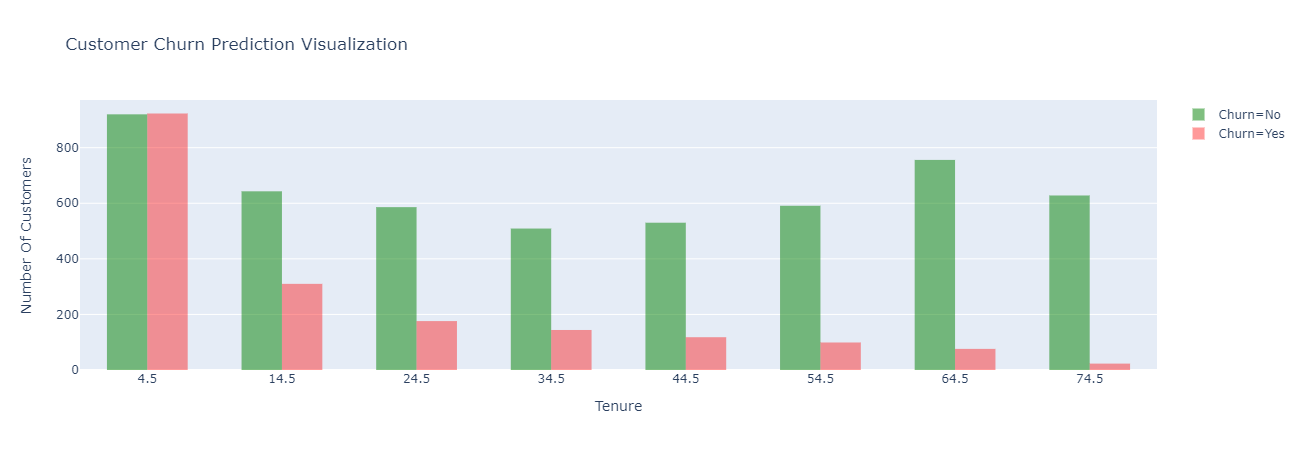

In [9]:
# Visualization: Creating histograms to compare tenure for Churn=No and Churn=Yes


# Filter data
tenure_churn_no = df[df.Churn == 'No'].tenure
tenure_churn_yes = df[df.Churn == 'Yes'].tenure

# Create histogram traces
trace_churn_no = go.Histogram(
    x=tenure_churn_no,
    opacity=0.5,
    marker=dict(color='green'),
    name='Churn=No',
    nbinsx=10
)

trace_churn_yes = go.Histogram(
    x=tenure_churn_yes,
    opacity=0.4,
    marker=dict(color='red'),
    name='Churn=Yes',
    nbinsx=10
)

# Create layout
layout = go.Layout(
    title="Customer Churn Prediction Visualization",
    xaxis=dict(title="Tenure"),
    yaxis=dict(title="Number Of Customers"),
    barmode='group',
    bargap=0.4, 
    
)

# Create figure
fig = go.Figure(data=[trace_churn_no, trace_churn_yes], layout=layout)

# Show the figure
fig.show()

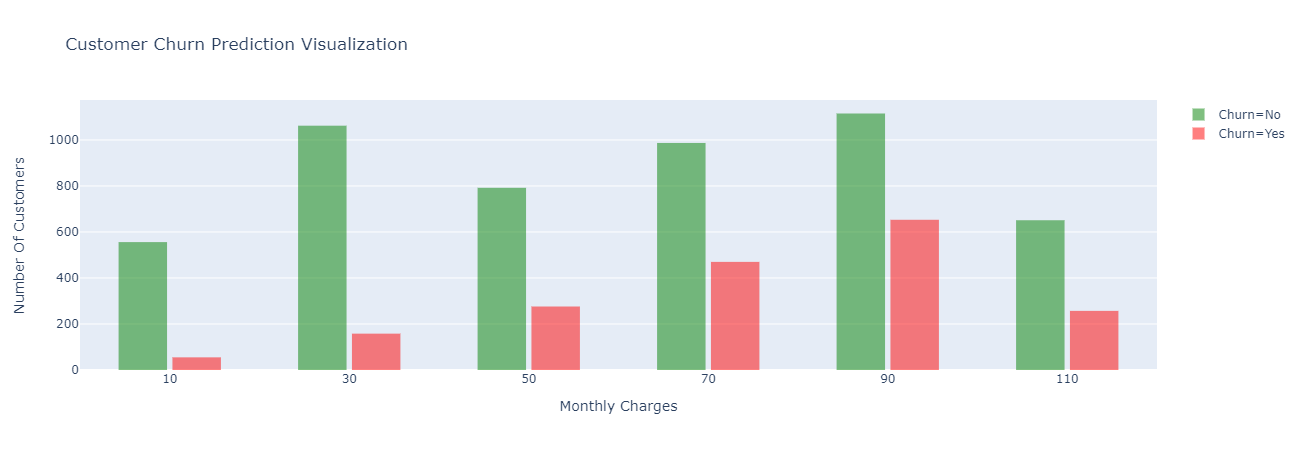

In [10]:
# Similar visualization for MonthlyCharges

# Filter data
mc_churn_no = df[df.Churn == 'No'].MonthlyCharges
mc_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges




# Create histogram traces with the specified number of bins
trace_mc_churn_no = go.Histogram(
    x=mc_churn_no,
    opacity=0.5,
    marker=dict(color='green'),
    name='Churn=No',
    nbinsx=10  # Set the number of bins here
)

trace_mc_churn_yes = go.Histogram(
    x=mc_churn_yes,
    opacity=0.5,
    marker=dict(color='red'),
    name='Churn=Yes',
    nbinsx=10  # Set the number of bins here
)

# Create layout with adjusted bar width
layout = go.Layout(
    title="Customer Churn Prediction Visualization",
    xaxis=dict(title="Monthly Charges"),
    yaxis=dict(title="Number Of Customers"),
    barmode='group',
    bargap=0.4,  # Calculate bargap based on bar width
    bargroupgap=0.1,
)

# Create figure
fig = go.Figure(data=[trace_mc_churn_no, trace_mc_churn_yes], layout=layout)

# Show the figure
fig.show()

# 4. Data Preprocessing

In [11]:
# Define a function to print unique values in object-type columns              
def print_unique_col_values(df):
    for column, dtype in df.select_dtypes(include=['object']).items():
        unique_values = df[column].unique()
        print(f'{column}: {unique_values}')                

# Print unique values for object-type columns
print_unique_col_values(df)                
                

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [12]:
# In this part, we define a data preprocessing pipeline using scikit-learn's Pipeline
# and ColumnTransformer to prepare data for machine learning.


# Define columns with binary 'Yes'/'No' values
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

# Define functions to replace values like "No internet service" and "No phone service" with simply "No" 
# in the specified columns. This is done to standardize the binary values.
def replace_yes_no_values(column):
    column.replace("No internet service", "No", inplace=True)
    column.replace("No phone service", "No", inplace=True)
    return column

# To encode the binary 'Yes'/'No' values into numerical values
def encode_yes_no_values(column):
    return column.replace({'Yes': 1, 'No': 0})

# Create transformer contain above functions
yes_no_transformer = Pipeline([
    ('replace_yes_no_values', FunctionTransformer(func=replace_yes_no_values)),
    ('encode_yes_no', FunctionTransformer(func=encode_yes_no_values))
])

# Create a pipeline for one-hot encoding categorical columns
categorical_transformer = Pipeline([
    ('one_hot_encode', OneHotEncoder())
])

# Create a pipeline for scaling numeric columns using Min-Max scaling
numeric_transformer = Pipeline([
    ('scale_features', MinMaxScaler())
])

# Create a column transformer to apply different transformers to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('yes_no', yes_no_transformer, yes_no_columns),
        ('categorical', categorical_transformer, ['gender', 'Contract', 'PaymentMethod', 'InternetService']),
        ('numeric', numeric_transformer, ['tenure', 'MonthlyCharges', 'TotalCharges'])
    ],
    remainder='passthrough'  # Include columns not specified in transformers
)

# Create the final data processing pipeline
data_processing_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])





# Save the pipeline
def preprocess_and_save_pipeline(df):
    # Separate features (X) and target (y)
    X = df.drop('Churn', axis='columns')
    y = df['Churn'].map({'Yes': 1, 'No': 0})

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

    # Fit the data processing pipeline to the training data
    X_train = data_processing_pipeline.fit_transform(X_train)

    # Save the pipeline to a file
    joblib.dump(data_processing_pipeline, 'preprocessor.pkl')



preprocess_and_save_pipeline(df)


# 5. Model Selection and Hyperparameter Tuning


**Handling Imbalanced Datasets with Class Weights**

We know that, the dataset is imbalanced, meaning that one class ("Churn: Yes") has significantly fewer samples than the other class ("Churn: No"). Handling imbalanced datasets is crucial because it can lead to biased models that perform poorly on minority classes. Traditionally, techniques such as undersampling (reducing the majority class samples), oversampling (increasing the minority class samples), or using Synthetic Minority Over-sampling Technique (SMOTE) are employed to balance the dataset.

However, instead of using these traditional methods, this code employs a different approach: using class weights. The class weights are assigned to different classes in the dataset to give higher importance to the minority class during model training. This method has some advantages over traditional techniques:

**No Data Modification:** Unlike undersampling and oversampling, which involve modifying the dataset by removing or duplicating samples, class weights do not require any changes to the original data.

**Less Risk of Overfitting:** Oversampling can lead to overfitting, especially when the minority class is small. Using class weights does not introduce additional data, reducing the risk of overfitting.

**Preserves Information:** Undersampling can lead to a loss of information by discarding samples. Class weights allow all data to be used in training.

In [ ]:
#Here we perform a grid search for hyperparameter tuning on several machine learning models and
# evaluate their performance using different scoring metrics.




# Function for grid search on a model with specified parameters
def grid_search_model(model, params, X_train, y_train, scorer):
    """
    This function performs a grid search on the given model with the provided parameters.
    
    
    Returns:
        best_estimator: The best model after grid search.
        best_params: The best hyperparameters found during grid search.
    """
    # Initialize GridSearch
    gs = GridSearchCV(model, params, scoring=scorer, cv=5, n_jobs=-1)
    
    # Fit the model
    gs.fit(X_train, y_train)
    
    # Return the best estimator and its best parameters
    return gs.best_estimator_, gs.best_params_


# Define a function for evaluating various metrics on a model
def evaluate_metrics(model, X_train, y_train, X_test, y_test):
    
    
    """
    This function evaluates the given model on multiple metrics for both training and test datasets.

    Returns:
        metrics: A dictionary containing various evaluation metrics for training and test datasets.
    """
    
    
    metrics = {}

    for dataset, X, y in [('train', X_train, y_train), ('test', X_test, y_test)]:
        y_pred = model.predict(X)
        y_prob = model.predict_proba(X)[:, 1]
        acc = accuracy_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        auc = roc_auc_score(y, y_prob)

        metrics[f'{dataset}_ACC'] = acc
        metrics[f'{dataset}_recall'] = recall
        metrics[f'{dataset}_f1_score'] = f1
        metrics[f'{dataset}_AUC'] = auc

    return metrics



# Define the main function for grid search
def main_grid_search(df):
    
    """
    This is the main function that performs grid search and model evaluation.
    Args:
        df: The input DataFrame containing features and labels.
    Returns:
        all_results: A dictionary containing evaluation results for different models and scoring metrics.
    """
    
    X = df.drop('Churn',axis='columns')
    y = df['Churn'].map({'Yes': 1, 'No': 0})

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
    
    # Fit the pipeline to your data
    X_train = data_processing_pipeline.fit_transform(X_train)
    X_test = data_processing_pipeline.transform(X_test)
    
    
    # Calculate the class weight to handle class imbalance
    weight = sum(y_train == 0) / sum(y_train == 1)
    
    # Define a dictionary of model names and their parameter grids
    models_and_parameters = {
        "LogisticRegression": {
            'model': LogisticRegression(),
            'params': {
                'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'class_weight': [{0: 1, 1: weight}],
                'penalty': ['l1', 'l2'],
                'solver': ['liblinear', 'saga']
            }
        },
        "RandomForestClassifier": {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [100, 300, 500],
                'max_depth': [None,2, 5, 10, 20, 30],
                'class_weight': [{0: 1, 1: weight}],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
        },
        "XGBClassifier": {
            'model': XGBClassifier(),
            'params': {
                'n_estimators': [100, 300, 500],
                'learning_rate': [0.01, 0.1, 0.5],
                'scale_pos_weight': [weight],
                'max_depth': [2, 3, 4, 5, 6],
                'subsample': [0.8, 0.9, 1.0],
                'colsample_bytree': [0.8, 0.9, 1.0]
            }
        },
        "CatBoostClassifier": {
            'model': CatBoostClassifier(verbose=False),
            'params': {
                'iterations': [100, 300, 500],
                'learning_rate': [0.01, 0.1, 0.5],
                'class_weights': [[1, weight]],
                'depth': [2,4, 6, 8],
                'l2_leaf_reg': [1, 3, 5, 7]
            }
        },
        "LGBMClassifier": {
            'model': LGBMClassifier(verbose=-1),
            'params': {
                'n_estimators': [100, 300, 500],
                'learning_rate': [0.01, 0.1, 0.5],
                'class_weight': [{0: 1, 1: weight}],
                'max_depth': [2, 3, 4, 5, 6],
                'min_child_samples': [5, 10, 20]
            }
        }
    }

    # Define the scorers
    scorers = {
        'recall': make_scorer(recall_score),
        'f1': make_scorer(f1_score),
        'roc_auc': make_scorer(roc_auc_score, greater_is_better=True, needs_proba=True)
    }
    
    
    
    # Create a master dictionary to store results for all scorers
    all_results = {}

    for scorer_name, scorer in scorers.items():
        scorer_results = {}

        for model_name, model_params in tqdm(models_and_parameters.items(), desc=f'Grid Searching models using {scorer_name}'):
            best_model, best_params = grid_search_model(model_params['model'], model_params['params'], X_train, y_train, scorer)

            # Evaluate metrics on the training and test set
            metrics = evaluate_metrics(best_model, X_train, y_train, X_test, y_test)
            metrics['best_params'] = best_params

            scorer_results[model_name] = metrics

        

        # Save results for the current scorer to the master dictionary
        all_results[scorer_name] = scorer_results
        print(all_results)

    return all_results

In [ ]:
# Perform grid search and model evaluation on the provided DataFrame
Full_grid_result = main_grid_search(df)

In [14]:
# As you know, grid search can be quite time-consuming.
# We can speed it up by checking fewer options or using a randomized grid search.
# However, for the sake of experimentation, I'm using a standard grid search in this code, which takes more than three hours to complete.

# This part of the code saves the results of the grid search.
# so that we don't have to run the grid search again in the future. This way, we save time and effort.



# To save the output dictionary, we can use joblib
joblib.dump(Full_grid_result, 'Full_grid_result.pkl')

# To load the saved dictionary, we  can use this code:
# loaded_data_dict = joblib.load('/kaggle/input/output-of-the-code/Full_grid_result.pkl')

# 6. Model Evaluation, Comparison and Visualization

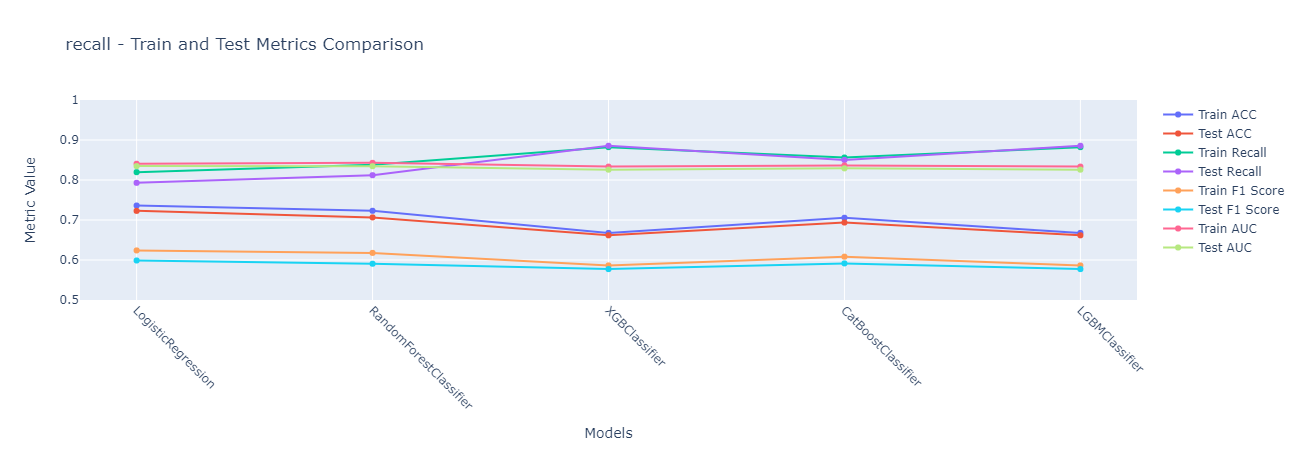

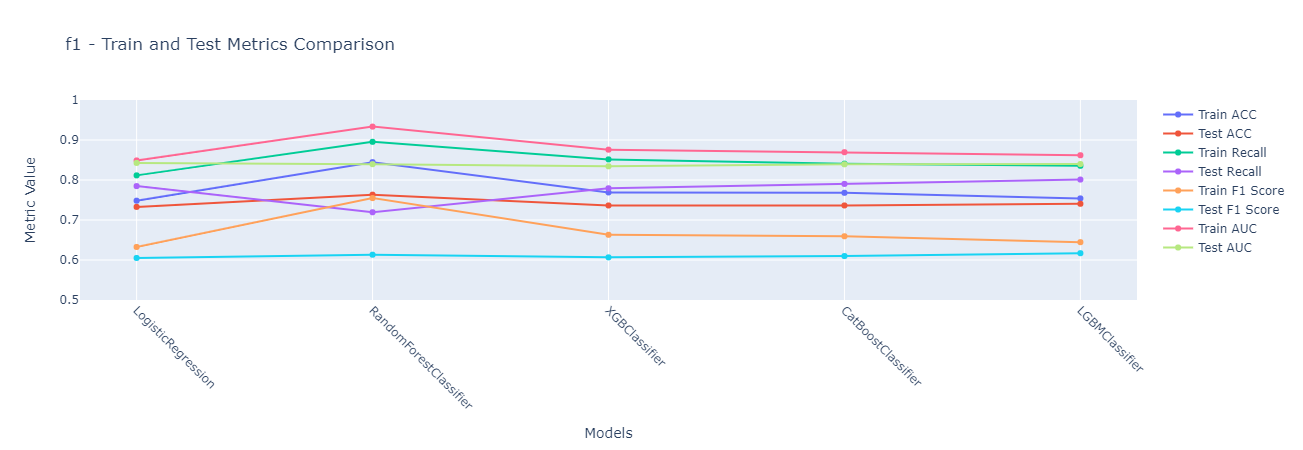

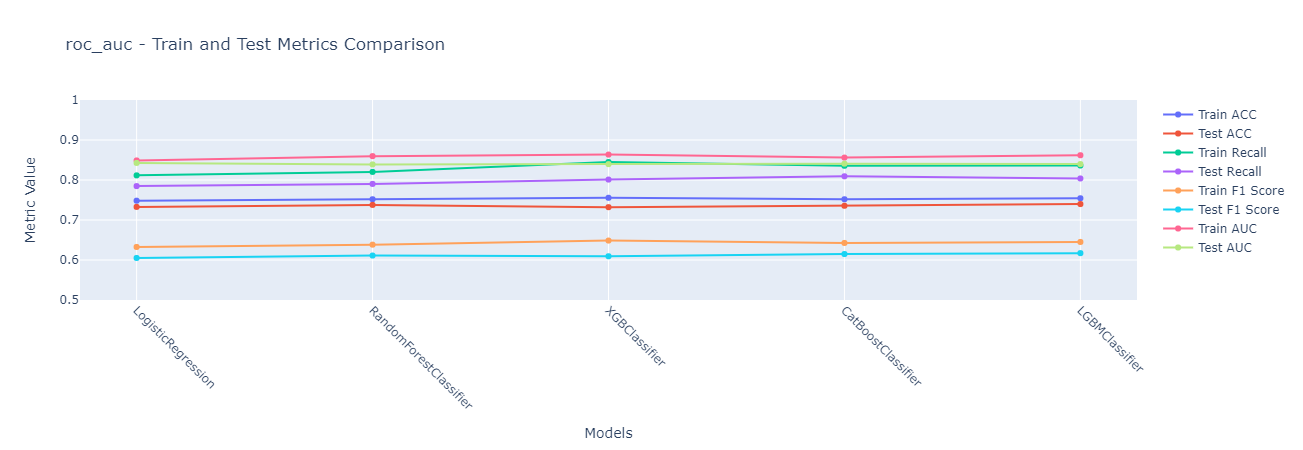

In [16]:
# This visualization is derived from the dictionary obtained by executing the main_grid_search() function.

# Define a function to plot and compare model metrics
def plot_comparison(data, scorer):
    models = list(data[scorer].keys())
    train_acc = [data[scorer][model]['train_ACC'] for model in models]
    test_acc = [data[scorer][model]['test_ACC'] for model in models]
    train_recall = [data[scorer][model]['train_recall'] for model in models]
    test_recall = [data[scorer][model]['test_recall'] for model in models]
    train_f1 = [data[scorer][model]['train_f1_score'] for model in models]
    test_f1 = [data[scorer][model]['test_f1_score'] for model in models]
    train_auc = [data[scorer][model]['train_AUC'] for model in models]
    test_auc = [data[scorer][model]['test_AUC'] for model in models]

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=models, y=train_acc, mode='lines+markers', name='Train ACC'))
    fig.add_trace(go.Scatter(x=models, y=test_acc, mode='lines+markers', name='Test ACC'))

    fig.add_trace(go.Scatter(x=models, y=train_recall, mode='lines+markers', name='Train Recall'))
    fig.add_trace(go.Scatter(x=models, y=test_recall, mode='lines+markers', name='Test Recall'))

    fig.add_trace(go.Scatter(x=models, y=train_f1, mode='lines+markers', name='Train F1 Score'))
    fig.add_trace(go.Scatter(x=models, y=test_f1, mode='lines+markers', name='Test F1 Score'))

    fig.add_trace(go.Scatter(x=models, y=train_auc, mode='lines+markers', name='Train AUC'))
    fig.add_trace(go.Scatter(x=models, y=test_auc, mode='lines+markers', name='Test AUC'))

    fig.update_xaxes(type='category', tickangle=45)
    fig.update_layout(title=f'{scorer} - Train and Test Metrics Comparison',
                      xaxis_title='Models',
                      yaxis_title='Metric Value')
    # Set y-axis range from 0.5 to 1
    fig.update_yaxes(range=[0.5, 1])
    
    fig.show()

# Call the function for each scorer
data = loaded_data_dict.copy()
for scorer in ['recall', 'f1', 'roc_auc']:
    plot_comparison(data, scorer)


# 7. Model Selection and Recommendation

We are grappling with the challenge of customer churn. In these scenarios, our main objective is to identify the positive class, which represents customers who intend to churn. Accurately predicting churn is critical. It's more acceptable to incorrectly label a loyal customer as churning (a false positive) than to overlook a customer who is genuinely planning to churn (a false negative).

Given the context, we have two primary approaches:

1- Prioritize Recall: In this approach, we emphasize recall, which measures the model's proficiency in detecting customers who are genuinely intending to churn. A high recall may come at the cost of a higher false positive rate, meaning we might wrongly identify some loyal customers as churning.

2 - Balanced Trade-off: The second approach aims to achieve a balance. We try to find a model that excels in recall and also maintains decent accuracy to reduce the number of false identifications.

For the first approach, models like XGBoost and LightGBM have shown promise.
For the second, balanced approach, CatBoost seems to strike an effective compromise between the two metrics.

I favor the CatBoost model because it provides a comprehensive and generalized solution.
Given its outstanding performance across various metrics, let's determine the best CatBoost model by examining the hyperparameters.

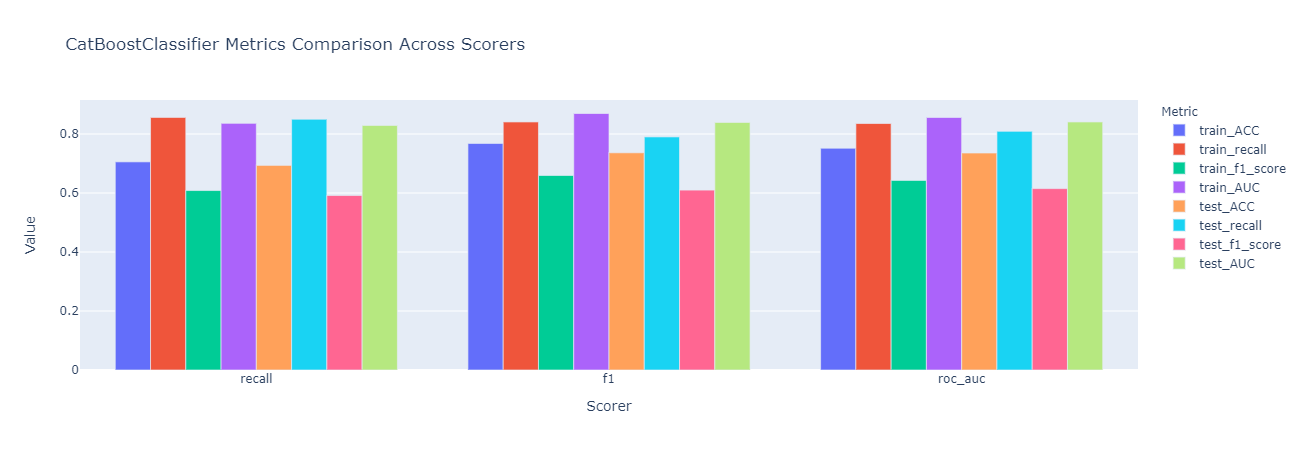

In [17]:
# In this analysis, we aim to compare CatBoost classifiers that were developed using different scoring metrics.
# The goal is to select the best-performing model to save for future use.
# The visualizations and comparisons are generated from the dictionary obtained through the execution of the main_grid_search() function.

data = loaded_data_dict.copy()

# Extract CatBoostClassifier results for each scorer
catboost_data = {scorer: data[scorer]['CatBoostClassifier'] for scorer in data}

# Define metrics to compare
metrics = ['train_ACC', 'train_recall', 'train_f1_score', 'train_AUC', 
           'test_ACC', 'test_recall', 'test_f1_score', 'test_AUC']

# Prepare data for plotting
plot_data = {}
for scorer in catboost_data:
    for metric in metrics:
        plot_data.setdefault(metric, []).append(catboost_data[scorer][metric])

# Create bar chart
fig = go.Figure()

for metric, values in plot_data.items():
    fig.add_trace(go.Bar(
        x=list(catboost_data.keys()),
        y=values,
        name=metric
    ))

fig.update_layout(
    barmode='group',
    title="CatBoostClassifier Metrics Comparison Across Scorers",
    xaxis_title="Scorer",
    yaxis_title="Value",
    legend_title="Metric"
)

fig.show()

**Analysis:**

* The CatBoostClassifier optimized for Recall has the highest recall, as expected. However, its F1 Score and AUC are the lowest among the three.

* The CatBoostClassifier optimized for F1 Score has a better balance between precision and recall, leading to the second-highest F1 Score. It also has a slightly higher AUC than the one optimized for recall.

* The CatBoostClassifier optimized for AUC has the highest F1 Score and AUC among the three. Its recall, while not the highest, is still reasonably high.

**Recommendation:**

Considering the balance across all metrics, the CatBoostClassifier optimized for AUC seems to be the most preferred. It has the highest F1 Score and AUC and maintains a good recall, indicating its capability to perform well in both identifying the positive class and distinguishing between the two classes.

In [18]:
# Extract the best hyperparameters for the chosen CatBoostClassifier.
best_params_catboost = loaded_data_dict['roc_auc']['CatBoostClassifier']['best_params']
print(best_params_catboost)

{'class_weights': [1, 2.745006657789614], 'depth': 2, 'iterations': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.1}


# 8. Displaying the Outcomes of the Chosen Model While Preserving the Model Itself

In [19]:
# Define a function to evaluate model, including the selected CatBoostClassifier
def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}
    
    for model in models:
        model_name = type(model).__name__
        results[model_name] = {}
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Get the probabilities for ROC AUC
        if hasattr(model, "predict_proba"):
            y_train_prob = model.predict_proba(X_train)[:, 1]
            y_test_prob = model.predict_proba(X_test)[:, 1]
        else:
            y_train_prob = y_train_pred  # For models that don't have predict_proba
            y_test_prob = y_test_pred
        
        # Metrics for training data
        results[model_name]['train_accuracy'] = accuracy_score(y_train, y_train_pred)
        results[model_name]['train_precision'] = precision_score(y_train, y_train_pred)
        results[model_name]['train_recall'] = recall_score(y_train, y_train_pred)
        results[model_name]['train_f1'] = f1_score(y_train, y_train_pred)
        results[model_name]['train_roc_auc'] = roc_auc_score(y_train, y_train_prob)
        
        # Metrics for test data
        results[model_name]['test_accuracy'] = accuracy_score(y_test, y_test_pred)
        results[model_name]['test_precision'] = precision_score(y_test, y_test_pred)
        results[model_name]['test_recall'] = recall_score(y_test, y_test_pred)
        results[model_name]['test_f1'] = f1_score(y_test, y_test_pred)
        results[model_name]['test_roc_auc'] = roc_auc_score(y_test, y_test_prob)
        
    return results



# Define the main function to train the model from scratch
def main_evaluation(df):
    
    X = df.drop('Churn',axis='columns')
    y = df['Churn'].map({'Yes': 1, 'No': 0})


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
    
    # Fit the pipeline to your data
    X_train = data_processing_pipeline.fit_transform(X_train)

    X_test = data_processing_pipeline.transform(X_test)
    
    weight = sum(y_train == 0) / sum(y_train == 1)
    
    models = [

        CatBoostClassifier(class_weights=[1, weight],  depth = 2, iterations =  100, l2_leaf_reg = 5, learning_rate = 0.1, verbose = False) 

    ]
    
    for model in tqdm(models, desc='Evaluating models'):
        results = evaluate_models(models, X_train, y_train, X_test, y_test)
        joblib.dump(model, 'catboost_model.joblib')
    return results    



# Perform model evaluation with the selected CatBoostClassifier
catboost_evaluated = main_evaluation(df)
catboost_evaluated

Evaluating models:   0%|          | 0/1 [00:00<?, ?it/s]

{'CatBoostClassifier': {'train_accuracy': 0.7505777777777778,
  'train_precision': 0.5207199665131854,
  'train_recall': 0.8282290279627164,
  'train_f1': 0.6394243125160628,
  'train_roc_auc': 0.8569559449071542,
  'test_accuracy': 0.7313432835820896,
  'test_precision': 0.49093904448105435,
  'test_recall': 0.8119891008174387,
  'test_f1': 0.6119096509240246,
  'test_roc_auc': 0.8443421190526096}}